In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
#import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('MNIST_train.csv')
test = pd.read_csv('MNIST_test.csv')

print('The shape of the Training data  : ', train.shape);
print('The shape of the Testing data  : ', test.shape)

The shape of the Training data  :  (60000, 787)
The shape of the Testing data  :  (10000, 787)


In [3]:
train.info();
print("-------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 360.3 MB
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 787 entries, Unnamed: 0 to 783
dtypes: int64(787)
memory usage: 60.0 MB


In [4]:
train.head(2)

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head(2)

,Unnamed: 0,index,labels,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,0,0,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.drop(['Unnamed: 0','index'],axis=1,inplace=True);
test.drop(['Unnamed: 0','index'],axis=1,inplace=True);

In [7]:
[train.shape,test.shape]

[(60000, 785), (10000, 785)]

In [8]:
train.info();
print("-------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, labels to 783
dtypes: int64(785)
memory usage: 359.3 MB
-------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, labels to 783
dtypes: int64(785)
memory usage: 59.9 MB


In [9]:
train.columns

Index(['labels', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=785)

In [10]:
train.head(3)

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
test.columns

Index(['labels', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '774', '775', '776', '777', '778', '779', '780', '781', '782', '783'],
      dtype='object', length=785)

In [12]:
test.head(3)

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train.iloc[:,0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: labels, dtype: int64

In [14]:
test.iloc[:,0].value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: labels, dtype: int64

In [15]:
X= train.iloc[:,1:]
y= train.labels
labels = sorted(y.unique())

In [16]:
X

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#sample digits

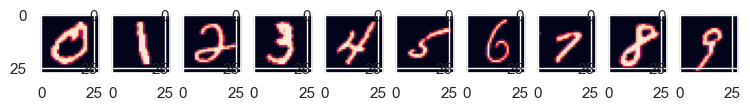

In [18]:
import seaborn as sns; sns.set();
plt.figure(figsize=(9,9))
for i in labels:
    plt.subplot(1,10, i+1)
    img = np.array( X[y==i][1:2] ).reshape(28,28)
    plt.imshow(img)

AVERAGE OF EACH VALUE

In [20]:
m = y.unique().shape[0]
n = X.shape[1]

mu = np.zeros((m,n))
si = np.zeros((m,n))
for i in labels:
    mu[i] = X[y==i].mean()
    si[i] = X[y==i].std()

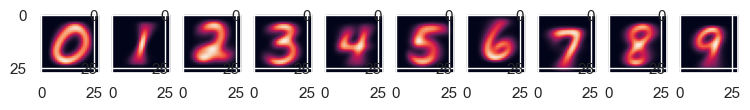

In [21]:
plt.figure(figsize=(9,9))
for i in labels:
    plt.subplot(1,10, i+1)
    img = np.array( mu[i] ).reshape(28,28)
    plt.imshow(img)

In [22]:
from sklearn.preprocessing import Normalizer

In [23]:
X=Normalizer().fit_transform(X)

In [24]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
nan_count = train.isna().sum().sum()
print(nan_count )

0


In [26]:
nan_countts = test.isna().sum().sum()
print(nan_countts)

0


In [27]:
nan_count2 = test.isna().sum().sum()
print(nan_count2)

0


In [28]:
class GaussNB():                           
    def fit(self,X,y, epsilon=1e-4):         
        self.likelihoods=dict()
        self.priors=dict()
        self.K=set(y.astype(int))
        
        for k in self.K:
            X_k=X[y==k,:]
            self.likelihoods[k]={"mean":X_k.mean(axis=0),"cov":X_k.var(axis=0)+epsilon}
            self.priors[k]=len(X_k)/len(X)
    
    
    def predict(self,X):
        N,D=X.shape                        
        P_hat=np.zeros((N,len(self.K)))
        
        for k,l in self.likelihoods.items():
                    
            P_hat[:,k]=mvn.logpdf(X,l["mean"],l["cov"])+np.log(self.priors[k])
            
        return P_hat.argmax(axis=1)     

In [29]:
def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [30]:
gnb=GaussNB()

In [31]:
gnb.fit(X,y)

In [32]:
y_hat=gnb.predict(X)

In [33]:
accuracy(y,y_hat)   #Bayes Train Accuracy 

0.8022833333333333

In [34]:
X_test= test.iloc[:,1:]

In [35]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X_test=Normalizer().fit_transform(X_test)

In [37]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
y_hat_test=gnb.predict(X_test)

In [39]:
y_test=test.labels

In [40]:
accuracy(y_test,y_hat_test)    #Bayes Test accuracy

0.8125

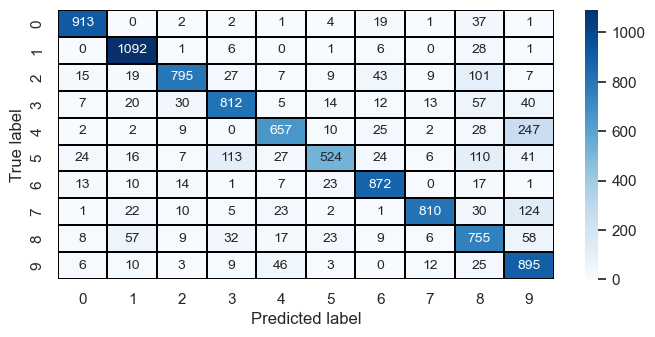

In [41]:
plt.figure(figsize=(8,3.5))
y_actu = pd.Series(y_test, name='Actual')
y_pred = pd.Series(y_hat_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.02, linecolor='black', annot_kws = {"size": 10})
plt.ylabel('True label')
plt.xlabel('Predicted label');

GAUSS

In [42]:
XG= train.iloc[:,1:]
yG= train.labels

In [43]:
XG=XG/255;
XG=XG.to_numpy();
#yG=XG[:,-1]

In [44]:
class GaussBayes():

  def fit(self, X, y, epsilon = 1e-7):
    self.likelihoods = dict()
    self.priors =dict()

    self.K = set(y.astype(int))

    for k in self.K:

      X_k = X[y==k,:]
      N_k,D = X_k.shape
      mu_k =X_k.mean(axis=0)
      self.likelihoods[k] = {"mean":X_k.mean(axis=0),
                             "cov":(1/(N_k-1))*np.matmul((X_k-mu_k).T,X_k-mu_k)+epsilon*np.identity(D)}
      self.priors[k]=len(X_k)/len(X)

  def predict(self, X):

    N, D  = X.shape
    P_hat = np.zeros((N, len(self.K)))

    for k , l in self.likelihoods.items():
      P_hat[:,k] = mvn.logpdf(X, l["mean"],l["cov"])+np.log(self.priors[k])


    return P_hat.argmax(axis=1)

In [45]:
gbayes=GaussBayes()

In [46]:
gbayes.fit(XG,yG)

In [47]:
y_trainG=gbayes.predict(XG)

In [48]:
accuracy(yG,y_trainG)  #gauss train accuracy

0.8057

In [49]:
X_testG= test.iloc[:,1:]
y_testG= test.labels

In [50]:
X_test=Normalizer().fit_transform(X_testG)

In [51]:
#X_testG=X_testG.to_numpy()

In [52]:
y_test_sample=y_testG

In [53]:
y_gauss_test=gnb.predict(X_test)

In [54]:
accuracy(y_test_sample,y_gauss_test)   #gauss test accuracy 

0.8125

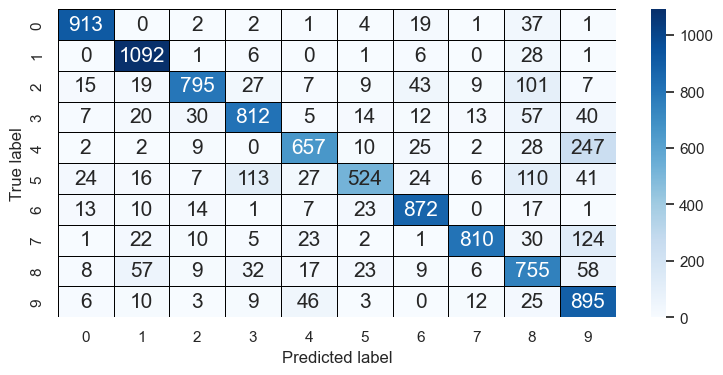

In [55]:
plt.figure(figsize=(9,4))
y_actu = pd.Series(y_test_sample, name='Actual')
y_pred = pd.Series(y_gauss_test, name='Predicted')
cm = pd.crosstab(y_actu, y_pred)
ax = sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

KNN

In [56]:
train_sample=train.sample(10000)   

In [57]:
train_sample.labels.value_counts(normalize=True)

1    0.1112
7    0.1066
2    0.1032
3    0.1012
6    0.0999
9    0.0980
8    0.0977
4    0.0976
0    0.0941
5    0.0905
Name: labels, dtype: float64

In [58]:
train.labels.value_counts(normalize=True)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
Name: labels, dtype: float64

In [59]:
X_sample= train_sample.iloc[:,1:]
y_sample= train_sample.labels

In [60]:
test_sample=test.sample(2000)

In [61]:
X_test_sample=test_sample.iloc[:,1:];
y_test_sample= test_sample.labels

In [62]:
X_train=Normalizer().fit_transform(X_sample)

In [63]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
X_test=Normalizer().fit_transform(X_test_sample)

In [65]:
class KNNClassifier():
    def fit(self,X,y):
        self.X=X
        self.y=y
    
    def predict(self,X,K,epsilon=1e-4):         
        N=len(X)
        y_hatK=np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2,axis=1)       #self.X>>> MATRIX  ARRAY OF ROWS??
            idxt=np.argsort(dist2)[:K]          #  will give indices  numpy array
            gamma_k=1/(np.sqrt(dist2[idxt]+epsilon))    #list of inverse of distances
            y_hatK[i]=np.bincount(self.y[idxt], weights=gamma_k).argmax()
        
        return y_hatK

In [66]:
X_train.shape

(10000, 784)

In [67]:
y_sample=y_sample.to_numpy()

In [68]:
y_sample

array([3, 9, 3, ..., 3, 2, 8], dtype=int64)

In [69]:
knn=KNNClassifier()

In [70]:
knn.fit(X_train,y_sample)

In [71]:
y_train_predict=knn.predict(X_train,5)     #train data predict  KNN

In [72]:
accuracy(y_sample,y_train_predict)     #train data accuracy KNN

1.0

In [73]:
y_test_predict=knn.predict(X_test,5)    #test data predict KNN

In [74]:
accuracy(y_test_sample,y_test_predict)   #test data accuracy KNN

0.957

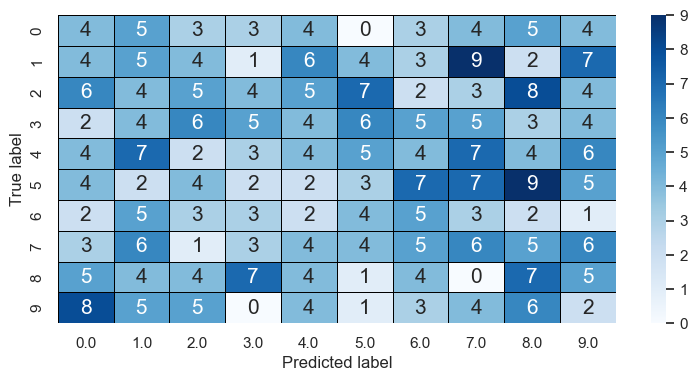

In [87]:
plt.figure(figsize=(9,4))
y_actu=pd.Series(y_test_sample, name='Actual')
y_pred=pd.Series(y_test_predict, name='Predicted')
cm=pd.crosstab(y_actu, y_pred)
ax=sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", linewidths=.5, linecolor='black', annot_kws = {"size": 15})
plt.ylabel('True label')
plt.xlabel('Predicted label');

Taking 5 samples and comparing the predictions with the original ones

In [76]:
sample=test.sample(5)

In [77]:
sample

,labels,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
6377,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7812,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
955,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3654,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
testing=sample.iloc[:,1:]

In [79]:
norm=Normalizer().fit_transform(testing)

In [80]:
norm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
norm_predict=knn.predict(norm,5)

In [82]:
norm_predict

array([7., 1., 5., 8., 0.])

In [83]:
sample.labels

6377    7
7812    1
955     5
3654    5
2873    0
Name: labels, dtype: int64

In [88]:
print("accuracy_train_bayes",round(accuracy(y,y_hat),3));
print("accuracy_test_bayes",accuracy(y_test,y_hat_test));
print("--------------")
print("accuracy_train_gauss",round(accuracy(yG,y_trainG),3));
print("accuracy_test_gauss",0.812);   
print("--------------")
print("accuracy_train_KNN",accuracy(y_sample,y_train_predict));
print("accuracy_test_KNN",round(accuracy(y_test_sample,y_test_predict),3));



accuracy_train_bayes 0.802
accuracy_test_bayes 0.8125
--------------
accuracy_train_gauss 0.806
accuracy_test_gauss 0.812
--------------
accuracy_train_KNN 1.0
accuracy_test_KNN 0.957


In [89]:
all_scores= {"accuracy_train": {"navie bayes" : accuracy(y,y_hat),
    "gauss" : accuracy(yG,y_trainG),
    "KNN" : accuracy(y_sample,y_train_predict)}, 
    "accuracy_test": {"navie bayes" : accuracy(y_test,y_hat_test),
    "gauss" : accuracy(y_test_sample,y_gauss_test),                     
    "KNN" : accuracy(y_test_sample,y_test_predict)}}
df=pd.DataFrame(all_scores)

In [90]:
df

,accuracy_train,accuracy_test
navie bayes,0.802283,0.8125
gauss,0.805700,0.8120
KNN,1.000000,0.9570
